In [1]:
import pandas as pd

df=pd.read_csv("C:\\loan.csv")
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [2]:
X=df.drop(['loan_id',' loan_status'],axis=1)
y=df[' loan_status']

In [3]:
X.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
dtype: int64

In [4]:
X=pd.get_dummies(X)

In [5]:
X.columns

Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' education_ Graduate',
       ' education_ Not Graduate', ' self_employed_ No',
       ' self_employed_ Yes'],
      dtype='object')

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [7]:
from sklearn.tree import DecisionTreeClassifier
m=DecisionTreeClassifier()
m.fit(X_train,y_train)

DecisionTreeClassifier()

In [8]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

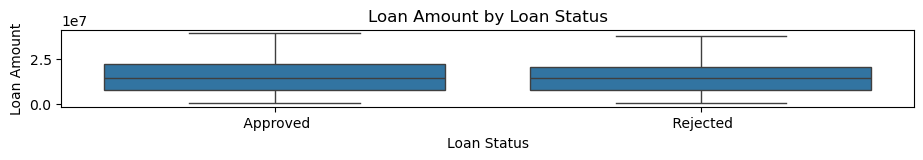

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(11, 1))
sns.boxplot(x=' loan_status', y=' loan_amount', data=df)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

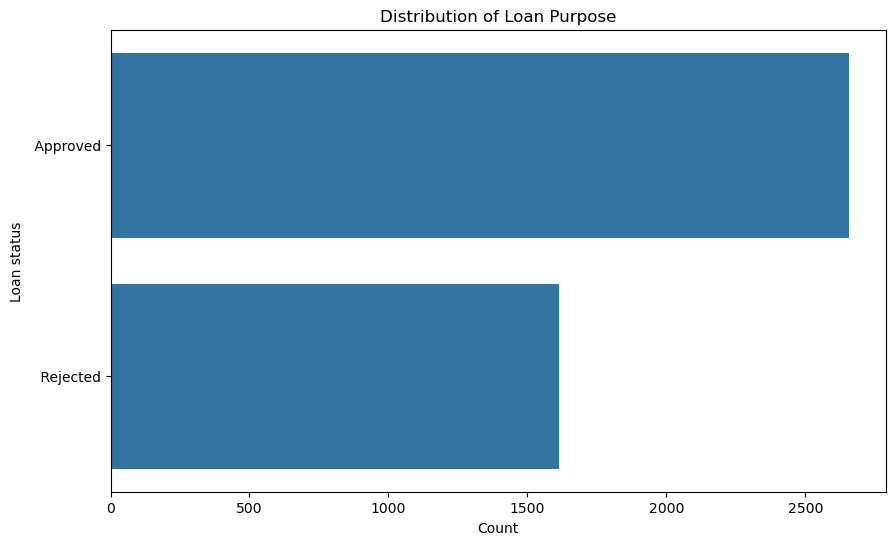

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(y=' loan_status', data=df)
plt.title('Distribution of Loan Purpose')
plt.xlabel('Count')
plt.ylabel('Loan status')
plt.show()

In [17]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [19]:
dep=int(input("Enter no. of Dependents"))
edu=input("Graduate or Not")
emp=input("Self employed or Not")
inc=int(input("Enter total income of a year"))
loan=int(input("Enter a loan amount"))
term=int(input("Enter a loan term"))
cibil=int(input("Enter a cibil score"))
res=int(input("Enter your resedential assets"))
com=int(input("Enter your commercial assets"))
lux=int(input("Enter your luxury assets such as car , accessories etc"))
bank=int(input("Enter your bank assets"))

data=[[dep,edu,emp,inc,loan,term,cibil,res,com,lux,bank]]
df1=pd.DataFrame(data,columns=[' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'])














Enter no. of Dependents 3
Graduate or Not  Graduate
Self employed or Not  Yes
Enter total income of a year 25985555
Enter a loan amount 1250000
Enter a loan term 42
Enter a cibil score 11
Enter your resedential assets 9600000
Enter your commercial assets 7600000
Enter your luxury assets such as car , accessories etc 6400000
Enter your bank assets 6600000


In [27]:
df1.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'],
      dtype='object')

In [29]:
missing_columns=set(X.columns)-set(df1.columns)
print(missing_columns)

{' education_ Not Graduate', ' self_employed_ No', ' education_ Graduate', ' self_employed_ Yes'}


In [31]:
for c in missing_columns:
    df1[c]=0

In [33]:
df1.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ No,education_ Graduate,self_employed_ Yes
0,3,Graduate,Yes,25985555,1250000,42,11,9600000,7600000,6400000,6600000,0,0,0,0


In [41]:
df1=df1[X_train.columns]

In [45]:
y_p=m.predict(df1)
if y_p=="Approved":
    print("Your Loan has been :",y_p,
         "Kindly Contact your nearby Loan Point")
else:
    print("Your Loan has been:", y_p)

Your Loan has been: [' Rejected']
